problrm statement:
    
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Load the titanic datasets

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Above is the list of all columns name/attribute

In [4]:
df.shape

(891, 12)

our data sets has 891 rows and 12 columns 

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Some columns are with datatype interger and some are with float, we have some with object type as well which we need to convert into numerical format.

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, cabin and Embarked columns has null values. Let's view it with visulization method.

<AxesSubplot:>

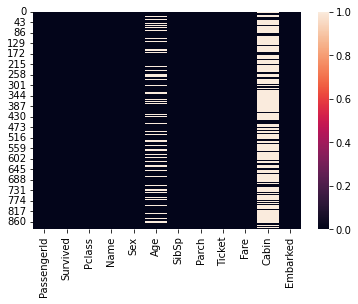

In [7]:
sns.heatmap(df.isnull())

Out of 891 rows, we have 177 missing value in age and 687 missing values in cabin, hence we need to fill missing values of age and we can drop column cabin as we have 70% to 80% missing values. Embarked column has only 2 values missing however we are unable to view the same now let's see the same thing after dropping unwanted columns.

In [8]:
#dropped the column "cabin"
df=df.drop('Cabin', axis=1)

We can see that Maximum embarked as with S, hence we will replcae the missing value with 'S'.

In [9]:
#df["Age"]=df["Age"].fillna(np.mean(df["Age"]))
df['Age']=df['Age'].replace(np.nan,df['Age'].mean())

In [10]:
df["Age"].count().sum()

891

We have replaced all null values from Age column to median value.

In [11]:
df['Embarked']=df['Embarked'].replace(np.nan,"S")

In [12]:
df["Embarked"].count().sum()

891

We have replaced mode i.e.'S' with the missing values as this column was categorical type of column.

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

now our datasets has no nan values present here.

In [14]:
df = df.drop('Ticket', axis=1)
df = df.drop('Name', axis=1)

dropping "ticket" and "Name" as it is not required for further analysis 

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [16]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


After performing label encoder technique data is converted in numrical type. Let us check the datatype

In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

Now we have only two columns with continuous type of values in it those are Age and Fare.

# Let's Describe our datasets:

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


there is a large difference between 75% and maximum for Age and Fare.so outliers are present in this dataset.lets see its with visualization.

<AxesSubplot:>

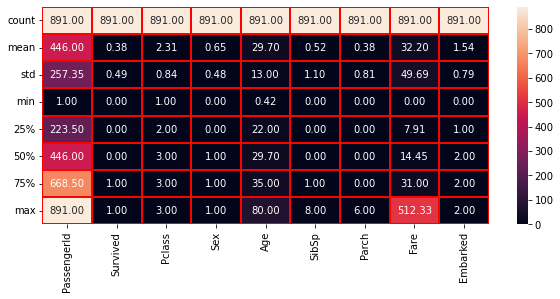

In [19]:
plt.figure(figsize=(10,4))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

# Correlation of the columns with target columns:

In [20]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

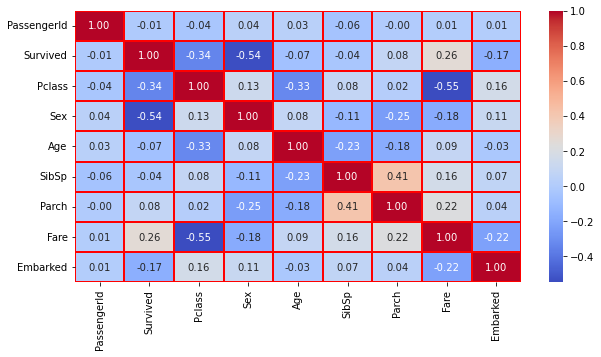

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="coolwarm")

Dropping the Parch as it is having low correlation with survived(target variable)

In [22]:
df = df.drop(['PassengerId','Parch'], axis=1)

Checking the columns which are positively and negative correlated with the target columns:

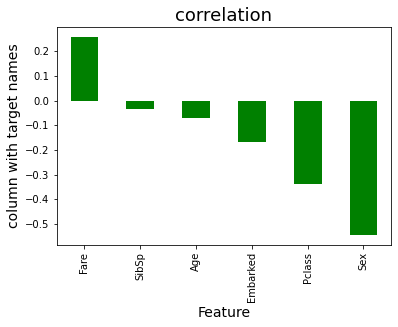

In [23]:
plt.figure()
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

above figure we can see that Fare and Sibsp are the positive relation with the target columns(Survived) and the rest are negative relation with the target column

# Let's do Visualization:

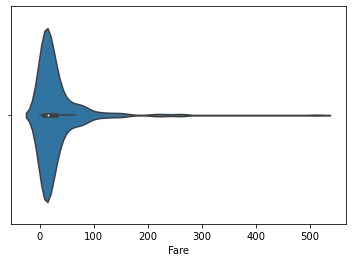

In [24]:
#show thw plots
sns.violinplot(x='Fare',data=df)
plt.show()

Above plot shows that maximum passengers have paid fare between 10 to 20 however we can see that some passenger have also paid fare between 200 and 300

<AxesSubplot:xlabel='Age'>

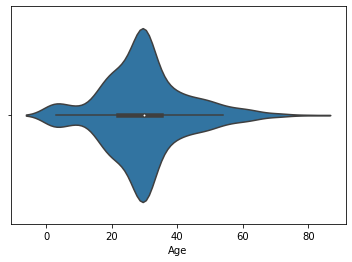

In [25]:
sns.violinplot(x='Age',data=df)

The average age of passenger looks like in between 22 to 30

<AxesSubplot:xlabel='Survived', ylabel='count'>

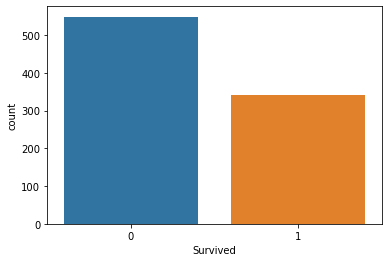

In [26]:
sns.countplot(df['Survived'])

0 stands for not survived and 1 for survived so we can see that out of 891 around 330 to 340 passengers survived

<AxesSubplot:xlabel='SibSp', ylabel='count'>

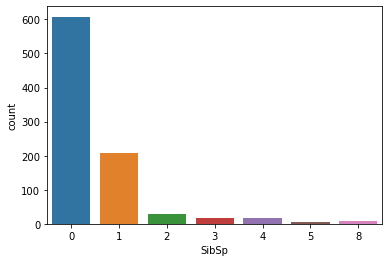

In [27]:
sns.countplot(df['SibSp'])

600 people are travelling single, rest peoples are travelling with sibling or spouse

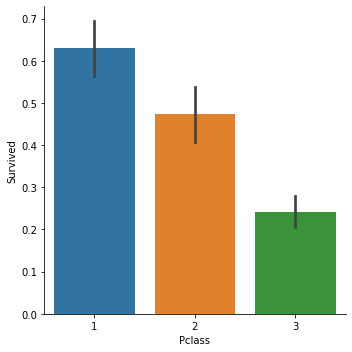

In [28]:
sns.catplot(x='Pclass',y='Survived',data=df,kind='bar')
plt.show()

Maximum survived passenger were from class 1 and class 3 has lowest number of survived passengers.

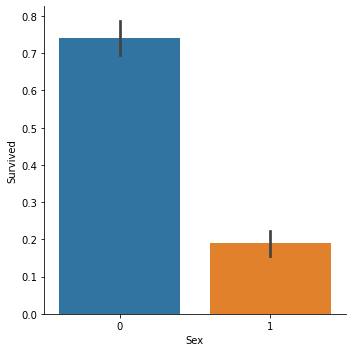

In [29]:
sns.catplot(x='Sex',y='Survived',data=df,kind='bar')
plt.show()

out of servived passengers , most of the peoples are female

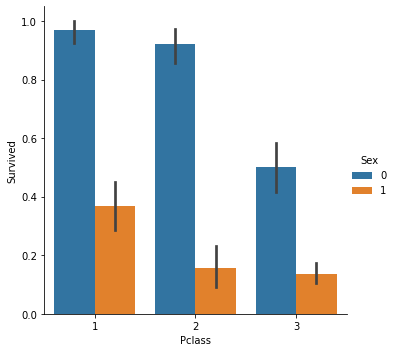

In [30]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='bar')
plt.show()

Here we can see survived passengers details with respect to class they belong to.

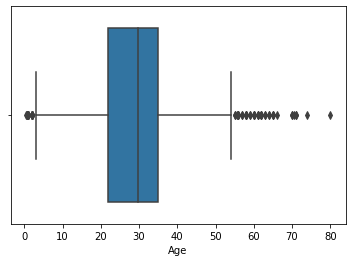

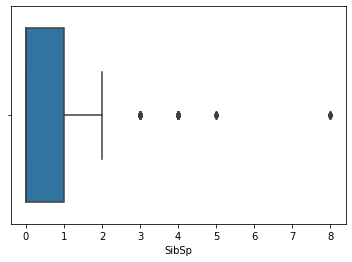

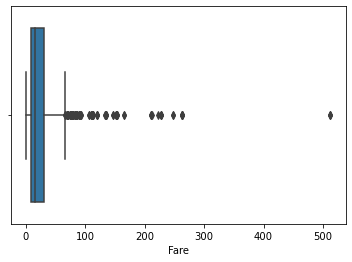

In [31]:
collist=df[['Age','SibSp','Fare']].copy()
for i in collist.columns:
        plt.figure()
        sns.boxplot(x=df[i])

Now we have only those columns with continuous type of values in it those are Age and Fare.so there are few outliers present here.

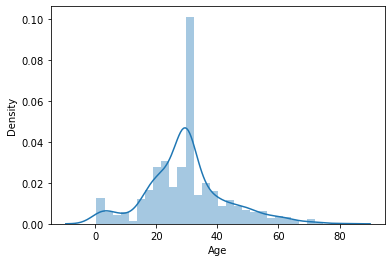

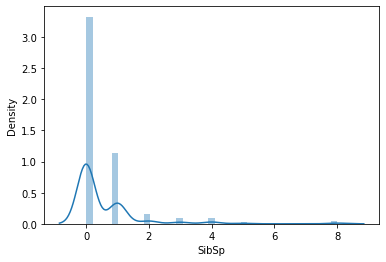

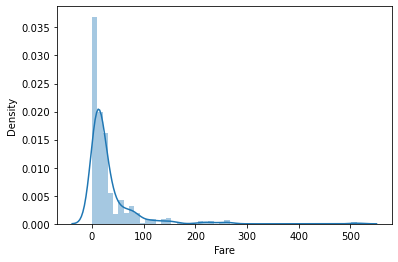

In [32]:
collist=df[['Age','SibSp','Fare']].copy()
for i in collist.columns:
        plt.figure()
        sns.distplot(collist[i])

those columns are skewness presesnt here

# outliers and Skewness removal:

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16,  27,  50,  59,  68,  71,  88,  96, 116, 118, 119, 159, 164,
        171, 180, 182, 201, 233, 258, 261, 266, 278, 299, 311, 324, 341,
        377, 380, 386, 438, 480, 493, 527, 541, 542, 557, 630, 672, 679,
        683, 686, 689, 700, 716, 730, 737, 742, 745, 779, 787, 792, 813,
        824, 846, 850, 851, 863], dtype=int64),
 array([4, 5, 4, 4, 4, 4, 5, 3, 3, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4,
        5, 5, 4, 5, 5, 5, 4, 5, 4, 3, 5, 4, 4, 5, 3, 3, 5, 4, 4, 5, 5, 5,
        5, 5, 5, 3, 5, 4, 4, 4, 4, 4, 4, 3, 4], dtype=int64))

In [34]:
df_new=df[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,1,22.000000,1,7.2500,2
1,1,1,0,38.000000,1,71.2833,0
2,1,3,0,26.000000,0,7.9250,2
3,1,1,0,35.000000,1,53.1000,2
4,0,3,1,35.000000,0,8.0500,2
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,13.0000,2
887,1,1,0,19.000000,0,30.0000,2
888,0,3,0,29.699118,1,23.4500,2
889,1,1,1,26.000000,0,30.0000,0


now removing all outliers

In [35]:
df_new.shape

(834, 7)

In [36]:
df.shape

(891, 7)

In [37]:
loss_percentage=((891-834)/891)*100
loss_percentage

6.397306397306397

we have 6.39 percentage data loss for removing outliers

In [38]:
x=df_new.drop("Survived",axis=1)
y=df_new["Survived"]
print(x.shape)
print(y.shape)

(834, 6)
(834,)


In [39]:
x.skew()

Pclass     -0.652927
Sex        -0.629551
Age         0.301548
SibSp       1.930324
Fare        2.327490
Embarked   -1.291102
dtype: float64

Keeping +/-0.5 as the range for skewness.only age and fare is the continuous data type . rest of them are not continuous data type.so no need to handle it and age is under this range

In [40]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)


In [41]:
df_new.skew()

Pclass     -0.442247
Sex        -0.629551
Age         0.067471
SibSp       0.911078
Fare       -0.015895
Embarked   -1.084686
dtype: float64

now skewness has reduce for fare column. no need to changes for rest of the columns because these data are not continuous type

# Lets perform standardization:

In [42]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
mns.fit_transform(df_new)

array([[1.        , 1.        , 0.37001119, 0.9191537 , 0.44166735,
        1.        ],
       [0.        , 0.        , 0.60877014, 0.9191537 , 0.85313869,
        0.        ],
       [1.        , 0.        , 0.43121175, 0.        , 0.457309  ,
        1.        ],
       ...,
       [1.        , 0.        , 0.48681926, 0.9191537 , 0.65279558,
        1.        ],
       [0.        , 1.        , 0.43121175, 0.        , 0.69752757,
        0.        ],
       [1.        , 1.        , 0.52098778, 0.        , 0.45337573,
        0.22122631]])

In [43]:
x=df_new

# class imbalancement:

In [44]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
x,y=oversample.fit_resample(x,y)

In [45]:
y.value_counts()

0    510
1    510
Name: Survived, dtype: int64

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.8578431372549019  on Random State  93


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

In [49]:
model=[DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),LogisticRegression()]

for m in model:
    m.fit(x_train,y_train)
    #m.score(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy Score of',m,'is:', acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of DecisionTreeClassifier() is: 0.8529411764705882
[[85 12]
 [18 89]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        97
           1       0.88      0.83      0.86       107

    accuracy                           0.85       204
   macro avg       0.85      0.85      0.85       204
weighted avg       0.85      0.85      0.85       204



Accuracy Score of SVC() is: 0.8186274509803921
[[85 12]
 [25 82]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        97
           1       0.87      0.77      0.82       107

    accuracy                           0.82       204
   macro avg       0.82      0.82      0.82       204
weighted avg       0.82      0.82      0.82       204



Accuracy Score of AdaBoostClassifier() is: 0.8137254901960784
[[79 18]
 [20 87]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
 

Accuracy for DecisionTreeClassifier is 84.80%, for SVC its 79.41% and for AdaBoostClassifier its 77.94% and for RandomForestClassifier its 84.31%

# Cross Validation:

In [50]:
model=[DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),LogisticRegression()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print("Score for ",m," is : ",score.mean())

Score for  DecisionTreeClassifier()  is :  0.7784313725490196
Score for  SVC()  is :  0.7892156862745098
Score for  AdaBoostClassifier()  is :  0.7960784313725491
Score for  RandomForestClassifier()  is :  0.8156862745098039
Score for  LogisticRegression()  is :  0.7823529411764705


Best model is RandomForestClassifier as there is very less differece model and cross validation compare to other models.

# AUC-ROC CURVE:

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [57]:
model=[DecisionTreeClassifier(),AdaBoostClassifier(),RandomForestClassifier(),LogisticRegression(),SVC(probability=True)]
for m in model:
    m.fit(x_train,y_train)
    y_pred_prob=m.predict_proba(x_test)[:,1]    
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')

AUC Score of DecisionTreeClassifier()
0.847914057230947


AUC Score of AdaBoostClassifier()
0.8137585509201272


AUC Score of RandomForestClassifier()
0.869014355910974


AUC Score of LogisticRegression()
0.8137585509201272


AUC Score of SVC(probability=True)
0.8213218999903651




as we can see that the AUC score of RandomForestClassifier is best. now we are Plotting roc_auc curve with the help of TPR(TRUE POSITIVE RATE) & FPR(FALSE POSITIVE RATE)

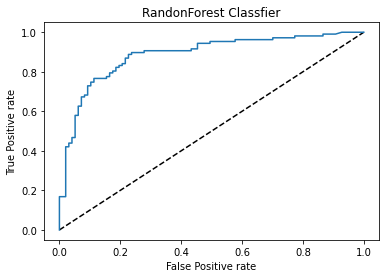

In [60]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('RandonForest Classfier')
plt.show()

# Hyperparameter Training:

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters = {'max_depth':np.arange(2,10),
             'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2']}

In [63]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [64]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [65]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2'}

In [66]:
Final_mod= RandomForestClassifier(criterion='entropy',max_depth=9,max_features='log2')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.74509803921569


After hyperparamete tuning,our accuracy has been improve.we are getting 87.74% accuracy

# Saving the best Model:

In [67]:
import pickle
filename= 'titanic_survived.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))

# Conclusion:

In [68]:
#load the model from the disk

loaded_model = pickle.load(open('titanic_survived.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8774509803921569


In [69]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=["Predicted","Orginal"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
Predicted,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,0,1,0,1,0,0
Orginal,1,1,0,1,1,0,1,0,1,1,...,0,1,1,0,0,1,0,1,0,0


In [ ]:
#end